In [1]:
# Data from the Titanic
# Excerice for pivot tables
# numpy, pandas, and matplotlib

In [54]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.shape

(891, 15)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df = titanic.groupby('sex')[['survived']].mean()

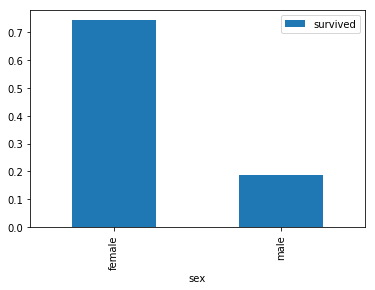

In [15]:
df.plot.bar()

In [61]:
result = pd.pivot_table(titanic, index='survived', 
                        columns='sex', 
                        values='pclass',
                        aggfunc=np.sum)

In [62]:
result

sex,female,male
survived,,
0,231,1159
1,447,220


Text(0.5,1,'Number of Men and Women how lived and died on the Titanic')

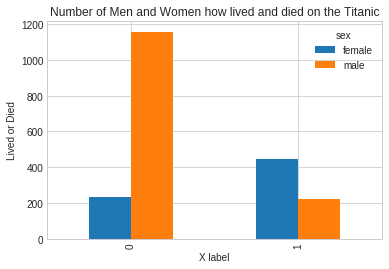

In [63]:
result.plot.bar()
plt.ylabel('Lived or Died')
plt.xlabel('X label')
plt.title('Number of Men and Women how lived and died on the Titanic')